In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [3]:
train_input = pd.read_csv("Credit_Risk_Train_data.csv")
validate_input = pd.read_csv("Credit_Risk_Validate_data.csv")

In [5]:
print(train_input.columns)
print(validate_input.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'outcome'],
      dtype='object')


In [7]:
validate_input.rename(columns={"outcome":"Loan_Status"},inplace=True)

In [9]:
data_all = pd.concat([train_input,validate_input],ignore_index=True)
data_all.shape

(981, 13)

In [11]:
data_all.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
data_all.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,Y
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,Y
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,N
980,LP002989,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,Y


# Exploratory Data Analysis (EDA)

## Missing Value Pre-Processing

<Axes: >

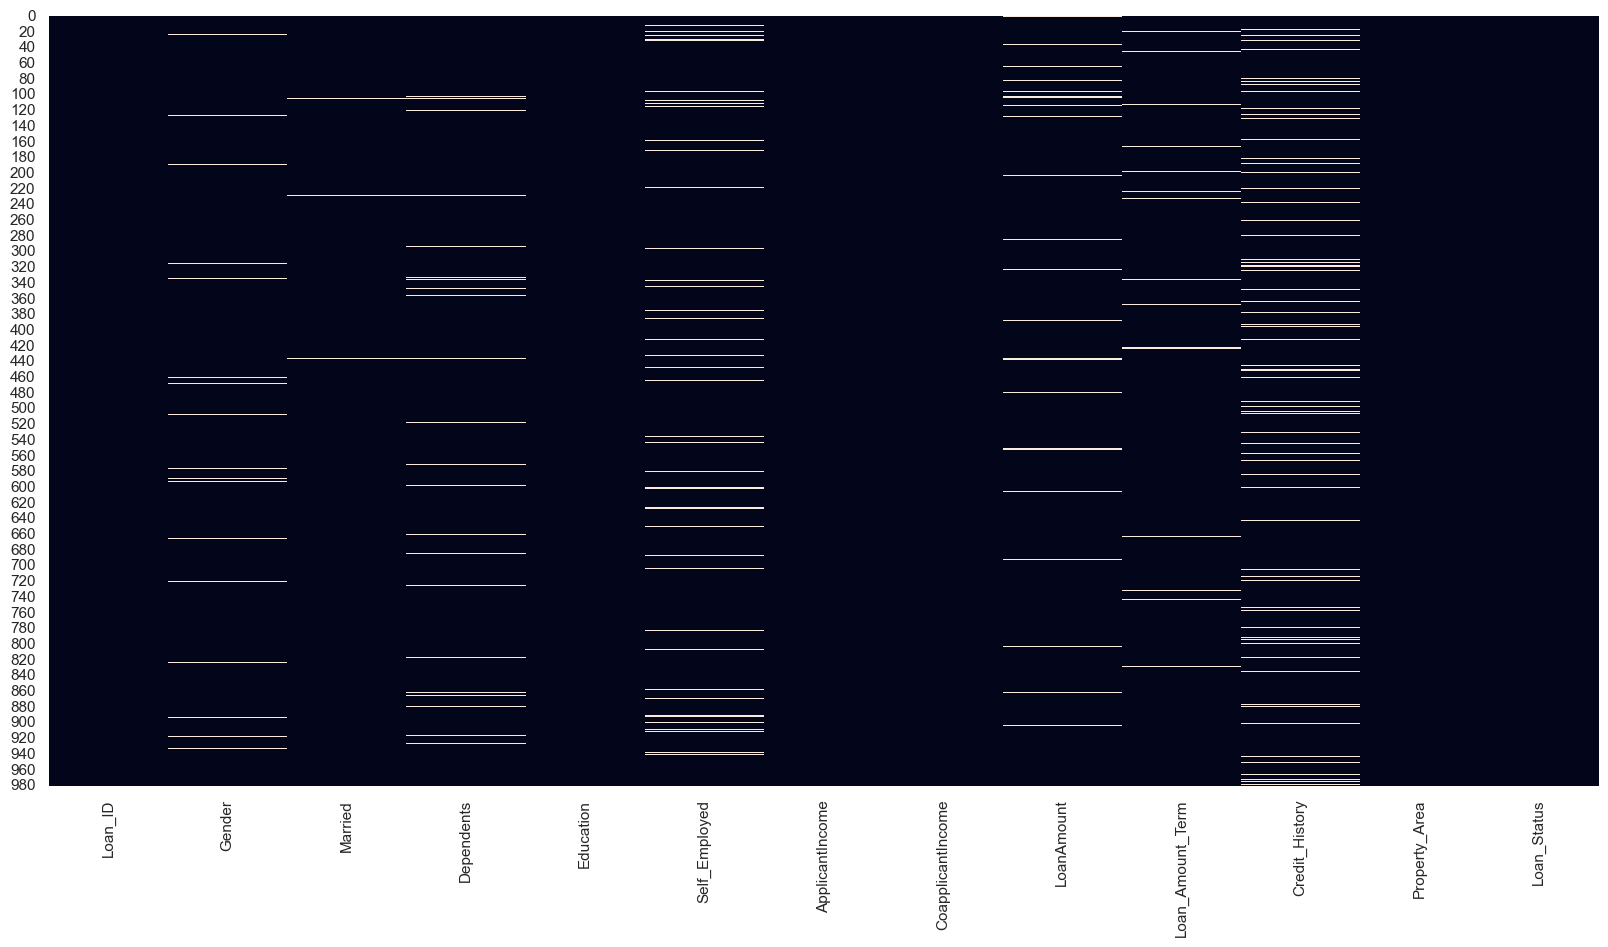

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(data_all.isnull(), cbar=False)

In [19]:
data_all.isnull().sum() 

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

## NaN fill with mode:

In [22]:
Counter(data_all['Gender'])

Counter({'Male': 775, 'Female': 182, nan: 24})

In [24]:
data_all.fillna({'Gender':'Male'},inplace=True)

In [26]:
Counter(data_all['Gender'])

Counter({'Male': 799, 'Female': 182})

In [28]:

print(Counter(data_all['Married'])) 

Counter({'Yes': 631, 'No': 347, nan: 3})


In [30]:
data_all.fillna({'Married':'Yes'},inplace=True)

In [32]:
print(Counter(data_all['Married']))

Counter({'Yes': 634, 'No': 347})


In [34]:
data_all.fillna({'Married':'Yes'},inplace=True)

In [36]:
data_all.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

## NaN fill with Cross Tab

In [39]:
Counter(data_all['Dependents'])

Counter({'0': 545, '1': 160, '2': 160, '3+': 91, nan: 25})

In [41]:
pd.crosstab(data_all['Married'],data_all['Dependents'].isnull())

Dependents,False,True
Married,,
No,338,9
Yes,618,16


In [43]:
pd.crosstab(data_all['Dependents'],data_all['Married'])

Married,No,Yes
Dependents,,
0,276,269
1,36,124
2,14,146
3+,12,79


In [45]:
bachelor_nulldependent = data_all[(data_all['Married']=="No") &
        (data_all['Dependents'].isnull())].index.tolist()

In [47]:
print(bachelor_nulldependent)

[293, 332, 355, 597, 684, 752, 879, 916, 926]


In [49]:
data_all['Dependents'].iloc[bachelor_nulldependent]='0'

In [51]:
Counter(data_all['Dependents'])

Counter({'0': 554, '1': 160, '2': 160, '3+': 91, nan: 16})

In [53]:
pd.crosstab(data_all['Gender'], data_all['Dependents'])

Dependents,0,1,2,3+
Gender,,,,
Female,127,32,13,9
Male,427,128,147,82


In [55]:
pd.crosstab((data_all['Gender']=='Male') &
            (data_all['Married']=='Yes'),data_all['Dependents'])

Dependents,0,1,2,3+
row_0,,,,
False,318,48,23,15
True,236,112,137,76


In [57]:
data_all['Dependents'].iloc[data_all[data_all['Dependents'].isnull()].index.tolist()]="1"

In [59]:
data_all.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [61]:
Counter(data_all['Self_Employed'])

Counter({'No': 807, 'Yes': 119, nan: 55})

In [63]:
data_all.fillna({'Self_Employed':'No'},inplace=True)

In [65]:
data_all.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

## NanN fill with Mean

In [68]:
pd.crosstab(data_all['LoanAmount'].isnull(),data_all['Loan_Amount_Term'].isnull())

Loan_Amount_Term,False,True
LoanAmount,,
False,934,20
True,27,0


In [70]:
pd.crosstab(data_all['LoanAmount'].isnull(), data_all['Loan_Amount_Term'])

Loan_Amount_Term,6.0,12.0,36.0,60.0,84.0,120.0,180.0,240.0,300.0,350.0,360.0,480.0
LoanAmount,,,,,,,,,,,,
False,1,2,3,3,7,4,64,7,20,1,800,22
True,0,0,0,0,0,0,2,1,0,0,23,1


In [72]:
data_all.groupby(data_all['Loan_Amount_Term'])['LoanAmount'].mean()

Loan_Amount_Term
6.0       95.000000
12.0     185.500000
36.0     117.666667
60.0     139.666667
84.0     121.142857
120.0     36.750000
180.0    131.125000
240.0    128.857143
300.0    166.250000
350.0    133.000000
360.0    144.420000
480.0    137.181818
Name: LoanAmount, dtype: float64

In [74]:
# lets fill the missing values in LoanAmount
data_all['LoanAmount'][(data_all['LoanAmount'].isnull()) & (data_all['Loan_Amount_Term']==360)]=144

# lets fill the missing values in LoanAmount
data_all['LoanAmount'][(data_all['LoanAmount'].isnull()) & (data_all['Loan_Amount_Term']==480)]=137

In [76]:
data_all['LoanAmount'][(data_all['LoanAmount'].isnull())]=130

In [78]:
(data_all['Loan_Amount_Term']).value_counts()

Loan_Amount_Term
360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
60.0       3
36.0       3
12.0       2
350.0      1
6.0        1
Name: count, dtype: int64

In [80]:
data_all['Loan_Amount_Term'][data_all['Loan_Amount_Term'].isnull()]=360

In [82]:
data_all.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [84]:
data_all['Credit_History'].value_counts()

Credit_History
1.0    754
0.0    148
Name: count, dtype: int64

In [86]:
pd.crosstab(data_all['Self_Employed'],data_all['Credit_History'])

Credit_History,0.0,1.0
Self_Employed,,
No,134,658
Yes,14,96


In [88]:
pd.crosstab(data_all['Education'],data_all['Credit_History'])

Credit_History,0.0,1.0
Education,,
Graduate,106,596
Not Graduate,42,158


In [90]:
# Married makes no difference
pd.crosstab(data_all['Married'],data_all['Credit_History'])

Credit_History,0.0,1.0
Married,,
No,56,263
Yes,92,491


In [92]:
data_all.fillna({'Credit_History':1},inplace=True)

In [94]:
data_all.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Categorical Feature Engineering

In [97]:
data_all.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,144.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [99]:
data_all['Dependents'].value_counts()

Dependents
0     554
1     176
2     160
3+     91
Name: count, dtype: int64

In [101]:
data_all['Dependents'][data_all['Dependents']=='3+']='3'
data_all['Dependents'].value_counts()

Dependents
0    554
1    176
2    160
3     91
Name: count, dtype: int64

In [103]:
data_all['Dependents'].head()

0    0
1    1
2    0
3    0
4    0
Name: Dependents, dtype: object

In [105]:
from sklearn.preprocessing import LabelEncoder

In [107]:
encoder = LabelEncoder()

In [109]:
result = encoder.fit_transform(data_all['Dependents'])
print(result[1:10])

[1 0 0 0 2 0 3 2 1]


In [111]:
dependents = pd.Series(result)
dependents.value_counts()

0    554
1    176
2    160
3     91
Name: count, dtype: int64

In [113]:
data_all['Dependents']=dependents

In [115]:
data_all['Dependents'].head()

0    0
1    1
2    0
3    0
4    0
Name: Dependents, dtype: int32

In [117]:
data_all_new = pd.get_dummies(data_all.drop(['Loan_ID'],axis=1), drop_first=True, dtype=int)

In [119]:
data_all_new.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0,5849,0.0,144.0,360.0,1.0,1,0,0,0,0,1,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1


In [121]:
X = data_all_new.drop(['Loan_Status_Y'],axis=1)
y = data_all_new['Loan_Status_Y']

In [123]:
X.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,144.0,360.0,1.0,1,0,0,0,0,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1


In [125]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status_Y, dtype: int32

## Data Splitting:

In [128]:
from sklearn.model_selection import train_test_split

In [130]:
seed = 42

In [132]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=seed)

In [134]:
X_train.shape

(686, 12)

In [136]:
X_test.shape

(295, 12)

# Feature Scaling:

In [139]:
from sklearn.preprocessing import StandardScaler

In [141]:
scaler = StandardScaler()

In [143]:
# Fit only to the training data
scaler.fit(X)

StandardScaler()

In [145]:
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [147]:

X_train[:5]

array([[ 1.18556961,  2.0178846 , -0.5895062 ,  1.73624774,  0.2705276 ,
         0.42151046,  0.47726799,  0.73980985, -0.53452248, -0.37155221,
        -0.74311183,  1.36690199],
       [-0.76421042, -0.51804127,  0.43132752,  0.43895089,  0.2705276 ,
        -2.37242036,  0.47726799, -1.35169869, -0.53452248, -0.37155221,
        -0.74311183,  1.36690199],
       [-0.76421042, -0.33533515, -0.5895062 , -0.68799385,  0.2705276 ,
         0.42151046,  0.47726799, -1.35169869,  1.87082869, -0.37155221,
        -0.74311183, -0.73158135],
       [-0.76421042,  1.35206132, -0.5895062 ,  3.43976886,  0.2705276 ,
         0.42151046,  0.47726799, -1.35169869, -0.53452248, -0.37155221,
         1.34569248, -0.73158135],
       [ 0.2106796 , -0.07410053, -0.5895062 ,  0.20307874,  2.13246098,
         0.42151046,  0.47726799,  0.73980985, -0.53452248, -0.37155221,
         1.34569248, -0.73158135]])

In [149]:
y_train.describe()

count    686.000000
mean       0.725948
std        0.446361
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Loan_Status_Y, dtype: float64

In [151]:
y_test.describe()

count    295.000000
mean       0.725424
std        0.447059
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Loan_Status_Y, dtype: float64

# Model Training and Comparision

## 1) Support Vector Machine Classification model

In [171]:
from sklearn.svm import SVC

In [173]:
# Train the SVM regression model
svm = SVC(kernel='linear')
svm.fit(X_train,y_train)

SVC(kernel='linear')

In [175]:
# Make predictions on the testing set
y_pred = svm.predict(X_test)
print(y_pred)

[1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1
 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1]


In [177]:
accuracy_SVR = svm.score(X_test,y_test)

print(f'Accuracy score of Support Vector Machine Regression is {(accuracy_SVR*100):.2f}')

Accuracy score of Support Vector Machine Regression is 84.41


## 2) Logistic Regression Model

In [180]:
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf

In [182]:
LR  = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [184]:
y_pred = LR.predict(X_test)


In [186]:
accuracy = LR.score(X_test,y_test)
print(f'Accuracy of Logistic Regression is {accuracy*100:.2f}')

Accuracy of Logistic Regression is 84.41


### 3) K-NN model predictions.

In [189]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [191]:
# initializes and runs the classifier
classifier = KNeighborsClassifier(n_neighbors=3)  
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [193]:

y_pred = classifier.predict(X_test) 

# gives the confusion matrix
conf = metrics.confusion_matrix(y_test, y_pred)
print(conf)

[[ 42  39]
 [ 16 198]]


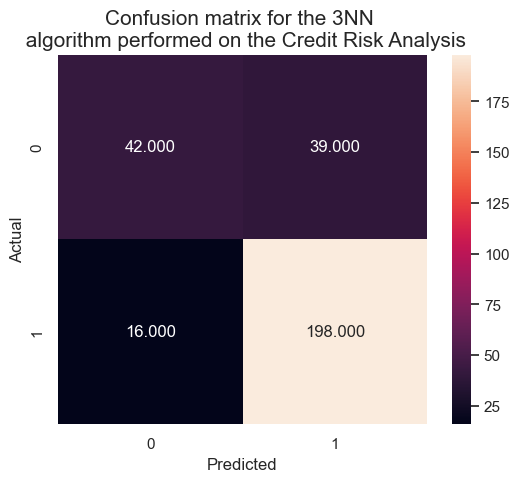

In [195]:
sns.heatmap(conf, annot=True, fmt=".3f", square = True);
plt.ylabel('Actual');
plt.xlabel('Predicted');
plt.title('Confusion matrix for the 3NN \n algorithm performed on the Credit Risk Analysis', fontsize = 15);

In [197]:
accuracy_score_clf = classifier.score(X_test,y_test)
print(f'Accuracy of K-NN {(accuracy_score_clf*100):.2f}')

Accuracy of K-NN 81.36
